# Assignment2_Tianxiang_Ren

Implement a single neuron neural network, aka, the logistic regression unit. Use Log Loss Function, write code to carry out stochastic gradient descent (SGD) for optimization, and then write a different activation function i.e., replace the sigmoid non-linearity by ReLu or tan. Ideally, implement as a set of functions*.

Run it on any classification problem using a dataset from the internet (say the titanic dataset or housing dataset). Provide accuracy and F1 score of the results. Please write code in Python in a Jupyter notebook.



In [3]:
import pandas as pd
import math
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
url = 'https://github.com/rentxiang/INFO7390/blob/master/gender_classification_v7.csv?raw=true'
df = pd.read_csv(url)

Dataset could be found on Kaggles: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

Get Dataset Info, check null and trying to see if we need clean

In [5]:
df.info

<bound method DataFrame.info of       long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      l

In [6]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [7]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [8]:
#Encoding the labels to categorical values
df.gender = df.gender.astype('category').cat.codes

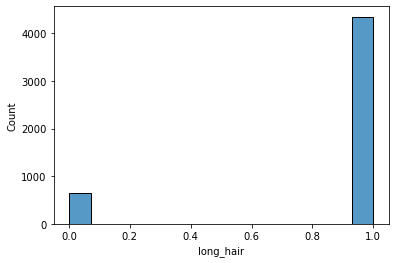

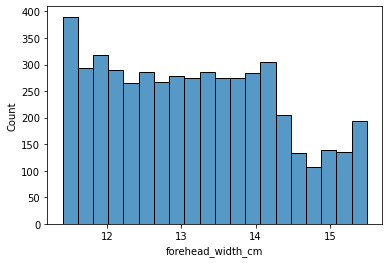

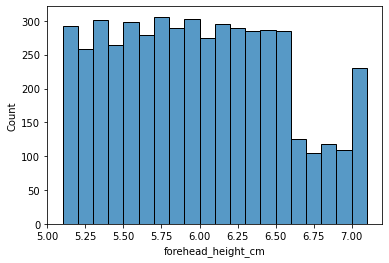

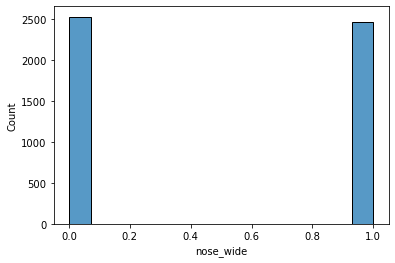

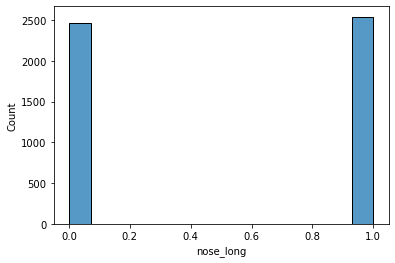

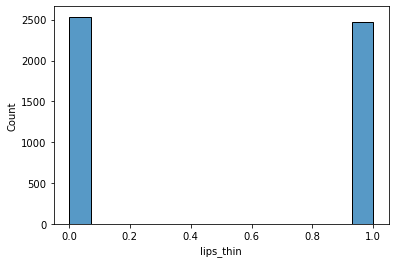

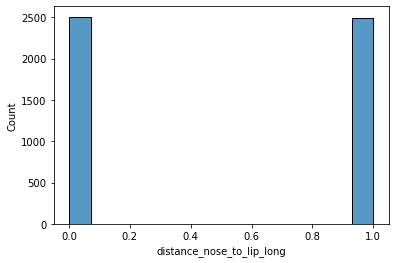

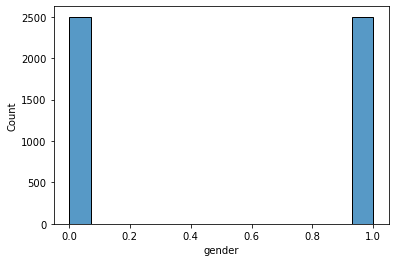

In [9]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.histplot(df[col])

In [10]:
#Creating a train-test split
size = int(0.8 * len(df))

train_set = df[:size]
test_set = df[size:]

In [11]:
#Separating labels and predictor variables
y_train = train_set[['gender']]
X_train = train_set.drop('gender', 1)

y_test = test_set[['gender']]
X_test = test_set.drop('gender', 1)

/var/folders/c2/1mhlns5x72l3rrdzkx8jtvzr0000gn/T/ipykernel_47304/958989565.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = train_set.drop('gender', 1)
/var/folders/c2/1mhlns5x72l3rrdzkx8jtvzr0000gn/T/ipykernel_47304/958989565.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = test_set.drop('gender', 1)


In [12]:
#Converting dataframe into numpy array
y_train = np.array(y_train)
X_train = X_train.to_numpy()

y_test = np.array(y_test)
X_test = X_test.to_numpy()

In [13]:
#Defining the initial weights and bias
weight = np.zeros(X_train.shape[1])
bias = 0

In [14]:
#Defining the sigmoid function 
def Sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [15]:
loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = Sigmoid(np.dot(X_train[i],weight) + bias) 
    y = y_train[i]
    loss += np.multiply(np.log(y_pred), y) + np.multiply(np.log(1-y_pred), 1-y)
loss = - loss/X_train.shape[1]
print("The loss is:")
print(loss)

The loss is:
[396.08410318]


In [16]:
# Defining the accuracy metrics 
def accuracy_metrics(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if (actual[i]>0.5) == (predicted[i]>0.5):
            correct += 1
    return correct / float(len(actual)) * 100.0

In [17]:
# Defining the training hyperparameters
max_epoch = 100
learning_rate = 0.01
Training_data = {"trainLoss":[],"testLoss":[],"trainAccuracy":[],"testAccuracy":[]}

In [18]:
def fit_train():
    y_pred = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_train[i],weight) + bias)        
        loss += np.multiply(np.log(y_pred_temp), y_train[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_train[i]) 
        y_pred.append(y_pred_temp)
    loss = -loss/X_train.shape[1]
    
    return y_pred, loss

In [19]:
def fit_test():
    y_pred_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = Sigmoid(np.dot(X_test[i],weight)+bias)        
        loss_test += -(np.multiply(np.log(y_pred_temp), y_test[i])+ np.multiply(np.log(1-y_pred_temp), 1-y_test[i]))
        y_pred_test.append(y_pred_temp)    
        
    return y_pred_test, loss_test

In [20]:
def update_bias(bias):
    grad_bias = 0
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) #dJ/db
        for j in range(len(weight)):
            grad_w[j] += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i])*(X_train[i][j])

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias

In [21]:
def update_weight(): 
    for j in range(len(weight)):
        weight[j] = weight[j] - grad_w[j]*learning_rate/X_train.shape[0]
    
    return weight

In [22]:
for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%10==0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:396.084103
Test loss:0.346574
Training accuracy: 49.875000
Validation accuracy: 50.549451
Training loss:393.944447
Test loss:0.344840
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:392.095567
Test loss:0.343244
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:390.277239
Test loss:0.341648
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:388.474409
Test loss:0.340059
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:386.686049
Test loss:0.338482
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:384.911997
Test loss:0.336916
Training accuracy: 50.125000
Validation accuracy: 49.450549
Training loss:383.152165
Test loss:0.335364
Training accuracy: 73.650000
Validation accuracy: 74.225774
Training loss:381.406482
Test loss:0.333824
Training accuracy: 79.200000
Validation accuracy: 80.419580
Training loss:379.674876
Test loss:0.332296
Training accuracy: 7

In [23]:
# Define the confusion_matrix

def confusion_matrix(actual, predicted, labels):
    num_labels = len(labels)
    matrix = [[0 for _ in range(num_labels)] for _ in range(num_labels)]
    for i in range(len(actual)):
        true_label = actual[i]
        predicted_label = predicted[i]
        true_index = labels.index(true_label)
        predicted_index = labels.index(predicted_label)
        matrix[true_index][predicted_index] += 1
    return matrix

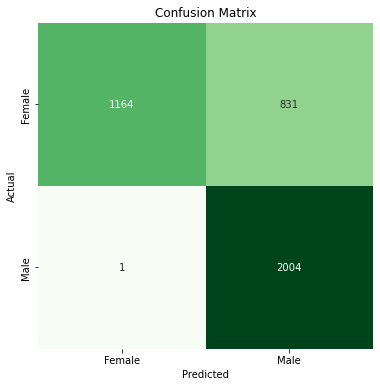

In [24]:
# Compute the confusion matrix

y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
for epoch in range(max_epoch):
  if epoch%100 == 0:  
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 79.200000
Validation accuracy: 80.419580


In [26]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fp)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(f1,2))

F1 score: 0.9991416309012876


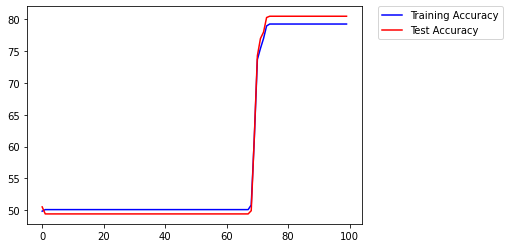

In [27]:
plt.plot(Training_data['trainAccuracy'],label='Training Accuracy',color='blue')
plt.plot(Training_data['testAccuracy'],label='Test Accuracy',color='red')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

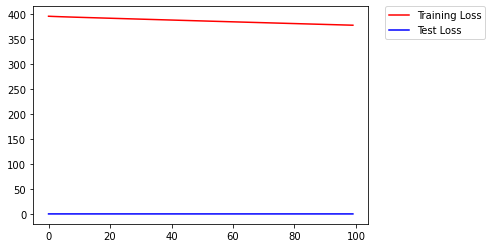

In [28]:
plt.plot(Training_data['trainLoss'],label='Training Loss',color='red')
plt.plot(Training_data['testLoss'],label='Test Loss',color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Replacing the Sigmoid activation function with ReLu

In [29]:
# Replacing the Sigmoid activation function with ReLu
# define the Relu function:
def ReLu(x):
    return max(0.0, x)
loss = 0
y_pred = defaultdict(list)
for i in range(X_train.shape[0]):
    y_pred = ReLu(np.dot(X_train[i],weight) + bias)
    y = y_train[i]
    loss += (y - y_pred)*(y - y_pred)
loss = loss/2

In [30]:
def fit_train_relu():
    y_pred = []
    loss = 0
    for i in range(X_train.shape[0]):
        y_pred_temp = ReLu(np.dot(X_train[i],weight) + bias)        
        loss += (y_train[i] - y_pred_temp)*(y_train[i] - y_pred_temp) 
        y_pred.append(y_pred_temp)
    loss = loss/(2 * X_train.shape[0])
    
    return y_pred, loss

In [31]:
def fit_test_relu():
    y_pred_test = []
    loss_test = 0
    for i in range(X_test.shape[0]):
        y_pred_temp = ReLu(np.dot(X_test[i],weight)+bias)        
        loss_test += (y_test[i] - y_pred_temp)*(y_test[i] - y_pred_temp) 
        y_pred_test.append(y_pred_temp) 
    return y_pred_test, loss_test

In [32]:
#Training the neural network with relu activation function
max_epoch = 50

for epoch in range(max_epoch):

  y_pred, loss = fit_train_relu()
  y_pred_test, loss_test = fit_test_relu()
        
  loss_test = loss_test/(2*X_test.shape[0])
  trainAcc = accuracy_metrics(y_train,y_pred)
  testAcc = accuracy_metrics(y_test,y_pred_test)
    
  Training_data["trainLoss"].append(loss)
  Training_data["testLoss"].append(loss_test)
  Training_data["trainAccuracy"].append(trainAcc)
  Training_data["testAccuracy"].append(testAcc)
    
    
  if epoch%10==0:
    print("Training loss:%f" %(loss))
    print("est loss:%f" %(loss_test))
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))
        
  y_pred = np.array(y_pred)  
  grad_w, bias = update_bias(bias)
  weight = update_weight()

Training loss:0.191798
est loss:0.189743
Training accuracy: 49.875000
Validation accuracy: 50.549451


/var/folders/c2/1mhlns5x72l3rrdzkx8jtvzr0000gn/T/ipykernel_47304/1403227261.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  y_pred = np.array(y_pred)


Training loss:0.087560
est loss:0.087069
Training accuracy: 96.425000
Validation accuracy: 97.302697
Training loss:0.085557
est loss:0.085057
Training accuracy: 96.450000
Validation accuracy: 97.302697
Training loss:0.083624
est loss:0.083114
Training accuracy: 96.425000
Validation accuracy: 97.302697
Training loss:0.081758
est loss:0.081238
Training accuracy: 96.350000
Validation accuracy: 97.202797


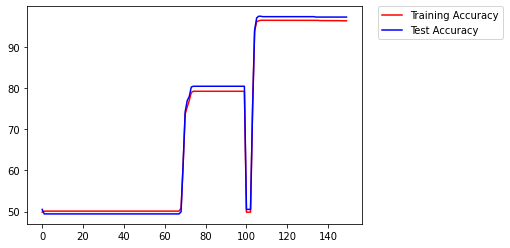

In [33]:
plt.plot(Training_data['trainAccuracy'],label='Training Accuracy',color='red')
plt.plot(Training_data['testAccuracy'],label='Test Accuracy',color='blue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

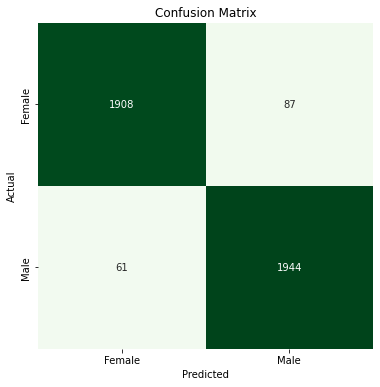

In [34]:
y_pred_cm = np.rint(y_pred)

cm = confusion_matrix(y_train, y_pred_cm, labels=[0, 1])

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Greens', cbar=False)
plt.xticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.yticks(ticks=[0.5,1.5], labels = ["Female", "Male"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
for epoch in range(max_epoch):
  if epoch%50 == 0:  
    print("Training accuracy: %f" %(trainAcc))
    print("Validation accuracy: %f" %(testAcc))

Training accuracy: 96.300000
Validation accuracy: 97.202797


In [36]:
tp = cm [0][0]
fp = cm [1][0]
tn = cm [1][1]
fn = cm [0][1]

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f1 = 2 * (precision * recall) / (precision + recall)

print("F1 score: {}".format(round(f1,2)))

F1 score: 0.96


Adding L1 (Lasso) and L2 (Ridge) Regression to the model

In [37]:
weight = np.zeros(X_train.shape[1])
bias = 0

In [38]:
def update_bias(bias):
    grad_bias = 0
    l1_penality = 0.05
    a,b = X_train.shape
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) 
        for j in range(len(weight)):
            if grad_w[j] > 0:
              grad_w[j] += (-(2*(X_train[i][j])*(y_train[i] - y_pred[i])) + l1_penality)/a
            else:
              grad_w[j] += (-(2*(X_train[i][j])*(y_train[i] - y_pred[i]) ) - l1_penality )/a

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias

In [39]:
max_epoch = 100
learning_rate = 0.001
for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%100 == 0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:396.084103
Test loss:0.346574
Training accuracy: 49.875000
Validation accuracy: 50.549451


In [40]:
weight = np.zeros(X_train.shape[1])
bias = 0

In [41]:
def update_bias(bias):
    grad_bias = 0
    l2_penality = 0.001
    a,b = X_train.shape
    grad_w = np.zeros(len(weight))
    for i in range(X_train.shape[0]):        
        grad_bias += (y_pred[i] - y_train[i])*(y_pred[i])*(1-y_pred[i]) 
        for j in range(len(weight)):
            grad_w[j] += -(2*(X_train[i][j])*(y_train[i] - y_pred[i]) + (2*l2_penality*weight[j]))/a 

    bias = bias - grad_bias*learning_rate/X_train.shape[0]   
    
    return grad_w, bias

In [42]:
max_epoch = 100

for epoch in range(max_epoch):

    y_pred, loss = fit_train()
    y_pred_test, loss_test = fit_test()
       
    loss_test = loss_test/(2*X_test.shape[0])
    trainAcc = accuracy_metrics(y_train,y_pred)
    testAcc = accuracy_metrics(y_test,y_pred_test)
    
    Training_data["trainLoss"].append(loss)
    Training_data["testLoss"].append(loss_test)
    Training_data["trainAccuracy"].append(trainAcc)
    Training_data["testAccuracy"].append(testAcc)
    
    
    if epoch%100 == 0:
        print("Training loss:%f" %(loss))
        print("Test loss:%f" %(loss_test))
        print("Training accuracy: %f" %(trainAcc))
        print("Validation accuracy: %f" %(testAcc))
    y_pred = np.array(y_pred)
    
    grad_w, bias = update_bias(bias)
    
    weight = update_weight()

Training loss:396.084103
Test loss:0.346574
Training accuracy: 49.875000
Validation accuracy: 50.549451


The logistic regression model performs well for the sigmoid activation function with an accuracy of 80.42% and 
f-1 score of 0.9. Implemented relu activation function for the model in place of sigmoid which provided positive outcome for the model evaluation.